<a href="https://colab.research.google.com/github/aaubs/ds-master/blob/main/notebooks/M3_1_LSTM_Tutorial_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# The objective of this tutorial

Our goal in this tutorial is to provide simple examples of the LSTM model so that you can better understand its functionality and how it can be used in a domain.

After completing this tutorial, you will know:


```
- What is an LSTM (Long Short-Term Memory)?
- How LSTMs work and their structure compared to traditional RNNs?
- The purpose and benefits of using LSTMs for tasks such as sequence generation?
- How to implement an LSTM in code using PyTorch?
- How to train and fine-tune an LSTM for a specific task?
- Common challenges and pitfalls to avoid when working with LSTMs?
- The difference between various types of RNNs (RNN and LSTM)?
```




#Long Short-Term Memory (LSTM) with PyTorch

LSTMs are a type of RNN, so you will gain a better understanding of LSTMs by understanding RNN concepts.


## A quick recap on RNNs

By processing inputs sequentially, RNNs calculate outputs by considering the context of previous inputs. As a result, the neural network can carry information over different time steps rather than keeping each input as an independent variable.

Due to the problem of vanishing/exploding gradients, RNNs are unable to work with longer sequences and hold on to long-term dependencies.


<img src="https://raw.githubusercontent.com/aaubs/ds-master/main/data/Images/RNN_Vanishing_Exploding.png" width="700">

#### Exploding gradient problem
```
- The gradients will be exploded if the gradient formula is deep (large T−t) and a single or multiple gradient values becoming
very high (if Wh2h > 1).

- This is less concerning than vanishing gradient problem because it can be easily solved by clipping the gradients
at a predefined threshold value.
```

#### Vanishing gradient problem
```
- The gradients will be vanished if the gradient formula is deep (large T−t) and a single or multiple gradient values
becoming very low (if -1 < Wh2h < 1).
- Calculating the error after several time step with respect to the first one, there will be a long dependency.
- If any one of the gradients approached 0, all the gradient would rush to zero exponentially fast
due to the multiplication of chain rule.
- This state would no longer help the network to learn anything which is known as vanishing gradient problem.
```
> Below is the effects of applying a sigmoid function over and over again, it became very flattened with no detectable slope where its gradient become close to 0.

<img src="https://raw.githubusercontent.com/aaubs/ds-master/main/data/Images/RNN_Vanishing.png" width="300">



Due to these issues, RNNs are unable to work with longer sequences and hold on to long-term dependencies, making them suffer from “short-term memory”.

This problem can be solved in 3 ways:.
```
- Activation Function (ReLU instead of Tanh)
- Weights initialization
- Changing Network Architecture
```

This section will focus on the 3rd solution that is changing the network architecture. In this solution, you modify the architecture of RNNs and use the more complex recurrent unit with Gates such as LSTMs or GRUs (Gated Recurrent Units).

## LSTM: How does it help?

LSTMs are a special type of Neural Networks that perform similarly to Recurrent Neural Networks, but run better than RNNs, and further solve some of the important shortcomings of RNNs for long term dependencies, and vanishing gradients.

<img src="https://raw.githubusercontent.com/aaubs/ds-master/main/data/Images/RNN-LSTM.png" width="700">



### Long-term Memory

The key building blocks behind LSTM are a cell state known as Long-term Memory and three different types of gates. Information is added or removed through these gates. Let's check these structuers:

<img src="https://raw.githubusercontent.com/aaubs/ds-master/main/data/Images/LSTM_Gates.png" width="700">

> Cell state is a memory of the LSTM cell and hidden state (cell output) is an output of this cell. Cells do have internal cell state, often abbreviated as “c”, and cells output is what is called a “hidden state”, abbreviated as “h”. Regular RNNs have just the hidden state and no cell state.


These gates are called the Input Gate, the Forget Gate, and the Output Gate. There are many variants to the names of these gates; nevertheless, the calculations and workings of these gates are mostly the same.

> Forget Gate: The forget gate decides which information from the long-term memory should be kept or discarded.

> Input Gate: The input gate decides what new information will be stored in the long-term memory. It only works with the information from the current input and the short-term memory from the previous time step. Therefore, it has to filter out the information from these variables that are not useful.

> Output Gate: The output gate will take the current input, the previous short-term memory, and the newly computed long-term memory to produce the new short-term memory/hidden state which will be passed on to the cell in the next time step. The output of the current time step can also be drawn from this hidden state.

### How does a Gate work in LSTM?

A gate consists of a neural net layer, like a sigmoid, and a pointwise multiplication shown in red in the figure above.

<img src="https://raw.githubusercontent.com/aaubs/ds-master/main/data/Images/Sigmoid_pointwise-multiplication.jpeg" width="200">

> Sigmoid is forcing the input between 0 and 1, which determines how much information is captured when passed through the gate, and how much is retained when it passes through the gate. For example, 0 means no information is retained, and 1 means all information is retained.

<img src="https://raw.githubusercontent.com/aaubs/ds-master/main/data/Images/LSTM_cellstate.png" width="500">

> Pointwise multiplication in an LSTM is used to control the flow of information through the network by element-wise multiplying matrices, For instance, the output of the forget gate after applying the sigmoid function is a matrix of values between 0 and 1. When we perform pointwise multiplication of this matrix with the cell state from the previous time step, it determines how much of the past information to retain or forget. A value close to 0 means that the corresponding value in the cell state is mostly forgotten, while a value close to 1 means it is mostly retained.

> Tanh: Unlike the sigmoid function, which outputs values in the range [0,1][0,1], the tanh function is zero-centered, meaning its output ranges from -1 to 1. This ensures that the values within the LSTM cell, specifically the cell state and the hidden state, remain bounded. Bounded values help in preventing the gradients from exploding during backpropagation, which is a common problem in training deep neural networks. The zero-centered property can lead to more efficient learning and faster convergence during training, as it prevents the gradients from always being positive or always being negative, which can cause issues like the vanishing gradient problem

Long story short:

> - **Sigmoid:** Decide which information is relevant.
- **Pointwise Multiplication:** Applied to execute the selection process.
- **Tanh:** Preventing the exploding gradient problem during training by ensuring values and gradients remain within a certain range.

In summary:

> - **Forget Gate:** Decides what information from the cell state should be thrown away or kept.
- **Input Gate:** Updates the cell state with new information.
- **Output Gate:** Decides the next hidden state.

###Structure of LSTM

Now, let’s dig deeper to understand what is happening under the hood. LSTM consists of five different parts:
1. Linear part (Parameters: This includes the weights and biases of the input-to-hidden layer, the hidden-to-hidden layer, and the hidden-to-output layer.)
> *The hidden state and cell state are used to capture the information from the previous time steps, but this information is not relevant after the training process is finished. Therefore, resetting the hidden and cell state parameters to zero ensures that the network starts with a clean slate for making predictions on new, unseen data.*

2. The hidden state (also known as the Short-term Memory)
> *you can think of the hidden state as representing the "short term or working memory" of the network, which is updated at each time step and used to produce the output.*

3. The cell state (also known as the Long-term Memory)
> *you can think of the hidden state as representing the "long term or working memory" of the network, which is updated at each time step and used to produce the output.*

4. Non-Linear part (Activation Function (Tanh and Sigmoid))
> As you can see in the equation above, you feed in both input vector Xt and the previous state ht-1 into the function. Here you’ll have 8 separate weight matrices then apply the Non-linearity (tanh and sigmoid) to the sum of input Xt, previous hidden state ht-1, and cell state ct-1 after multiplication to these weight matrices.

<img src="https://raw.githubusercontent.com/aaubs/ds-master/main/data/Images/LSTM_formula.png" width="800">


5. Fully connected part (Output Layer): Finally, you’ll have the output vector ŷt at the timestamp t.
> <img src="https://raw.githubusercontent.com/aaubs/ds-master/main/data/Images/sequence-3.png" width="150">


## LSTM code implementation

Let's get started with Data Preparation for the LSTM  implementation!

In [1]:
# import required libraries
import torch
import pandas as pd
import torch.nn as nn
import torch.optim as optim
import numpy as np
from torch.utils.data import DataLoader, TensorDataset
from sklearn import preprocessing
import matplotlib.pyplot as plt
from tqdm import tqdm

### Data Preparation

To understand how should we prepare the data for LSTM, we’ll use a simple dataset as a Timeseries Forecasting example. Below is the full sequence of values and their restructuring as a training and testing dataset.

<img src="https://raw.githubusercontent.com/aaubs/ds-master/main/data/Images/SequenceDataPerparation.webp" width="400">

Now, let’s separate the datasets into batches!

<img src="https://raw.githubusercontent.com/aaubs/ds-master/main/data/Images/Seq_DataPerparation_2.webp" width="100">

In [2]:
stock_data = np.array([10, 20, 30, 40, 50, 60, 70, 80, 90])

In [3]:
normalized_stock_data = preprocessing.normalize([stock_data])
print(normalized_stock_data)

[[0.05923489 0.11846978 0.17770466 0.23693955 0.29617444 0.35540933
  0.41464421 0.4738791  0.53311399]]


In [4]:
# Split the data into sequences for LSTM input
n_steps = 3
sequence_data = []
sequence_labels = []

for i in range(len(normalized_stock_data[0]) - n_steps):
    sequence_data.append(normalized_stock_data[0][i:i+n_steps])
    sequence_labels.append(normalized_stock_data[0][i+n_steps])

sequence_data = np.array(sequence_data)
sequence_labels = np.array(sequence_labels)

train_data = sequence_data[:4]
train_labels = sequence_labels[:4]
test_data = sequence_data[4:]
test_labels = sequence_labels[4:]

In [5]:
print("Train data: \n", train_data)
print("Labels: \n", train_labels)

Train data: 
 [[0.05923489 0.11846978 0.17770466]
 [0.11846978 0.17770466 0.23693955]
 [0.17770466 0.23693955 0.29617444]
 [0.23693955 0.29617444 0.35540933]]
Labels: 
 [0.23693955 0.29617444 0.35540933 0.41464421]


Implementing code for LSTM and RNN requires sequential data preparation. The data preparation process for these models is visualized here!


<img src="https://raw.githubusercontent.com/aaubs/ds-master/main/data/Images/sequence.gif" width="600">


In [6]:
# Split the data into training and testing sets
train_data = TensorDataset(torch.from_numpy(train_data), torch.from_numpy(train_labels))
test_data = TensorDataset(torch.from_numpy(test_data), torch.from_numpy(test_labels))

train_loader = DataLoader(train_data, batch_size=1, shuffle=True)
test_loader = DataLoader(test_data, batch_size=1, shuffle=False)

We then have to prepare the dataset. We need the data as Pytorch tensors so that we can use that in our model which we will make. We use the dataloader so that we can extract the data in batches. This is especially helpful for large datasets.

<img src="https://raw.githubusercontent.com/aaubs/ds-master/main/data/Images/TensorDataset.webp" width="600">



### Training LSTM

In order to create a LSTM, we follow the same steps as for implementing an ANN!


```
- Creating a Neural Network
- Network Evaluation
- Gradient Calculation
- Back Propagation
- Training
```




<img src="https://raw.githubusercontent.com/aaubs/ds-master/main/data/Images/LSTM_dynamic.gif" width="600">

In [7]:
# Initializing Hyperparameters
epochs = 300
lr = 0.3

train_losses = []
test_losses = []

# 1. Creating a FeedForwardNetwork
# 1.1 Structure (Architecture) of NN
# Define the input size, hidden size and number of outputs
input_size = 3
hidden_size = 6
output_size = 1


lstm = torch.nn.LSTM(input_size, hidden_size, batch_first=True)
# Initialize the output layer
fc = torch.nn.Linear(hidden_size, output_size)


# 1.2 Loss Function
loss_mse = torch.nn.MSELoss()

# 1.3 Optmization Approch
optimizer = torch.optim.SGD(lstm.parameters(), lr=lr)

In [8]:
# Combine the parameters of the LSTM layer and linear layer
params = list(lstm.parameters()) + list(fc.parameters())

# Print the number of parameters
print("Number of parameters:", sum(p.numel() for p in params))

# Print the shapes of the parameters
for name, param in lstm.named_parameters():
    print("Name: ", name)
    print("shape: ", param.shape)
    print("Weight: ", param.data)

Number of parameters: 271
Name:  weight_ih_l0
shape:  torch.Size([24, 3])
Weight:  tensor([[ 0.3092, -0.1671, -0.3433],
        [-0.3405,  0.3974,  0.0846],
        [ 0.0897,  0.2956, -0.2416],
        [ 0.3210, -0.0518,  0.1064],
        [ 0.0120,  0.2745,  0.0059],
        [-0.2376, -0.0363, -0.2538],
        [-0.3658, -0.1133,  0.1693],
        [-0.1027, -0.0338, -0.2863],
        [ 0.2199,  0.0963,  0.0878],
        [-0.1979,  0.2255, -0.2482],
        [ 0.0433, -0.3474,  0.0226],
        [ 0.0750,  0.1688,  0.2775],
        [-0.2101, -0.3792, -0.2950],
        [ 0.2089, -0.1040, -0.4055],
        [-0.3190, -0.4015,  0.3154],
        [ 0.2275,  0.2185,  0.1334],
        [-0.0521,  0.0950, -0.3862],
        [ 0.2020,  0.2611,  0.2460],
        [ 0.1048, -0.0977, -0.3192],
        [-0.2076,  0.0995,  0.1164],
        [ 0.2082,  0.3224, -0.1650],
        [-0.0574, -0.0219,  0.2688],
        [-0.2875,  0.0630, -0.3721],
        [ 0.3311,  0.3820, -0.1472]])
Name:  weight_hh_l0
shape:  

In [9]:
# Loop over the number of epochs
for i in range(epochs):
    train_loss = 0

    # Initialize the hidden state and the cell state
    # The hidden state and the cell state reset to zero for every epoch
    hs = torch.zeros(1, hidden_size)
    cs = torch.zeros(1, hidden_size)
    # Get the input and target at position i
    for i, (data, label) in enumerate(train_loader):

        hidden = (hs, cs)
        # 2. Forward Pass
        output, hidden = lstm(data.float(), hidden)
        output_fc = fc(hidden[-1])

        # 3. FeedForward Evaluation
        loss = loss_mse(output_fc, label.float())
        hs = hs.detach()
        cs = cs.detach()

        # 4. Backward Pass / Gradient Calculation
        loss.backward()

        # Store the loss for each epoch
        train_loss += loss.item()

        # 5. Back Propagation / Update Weights
        optimizer.step()
        optimizer.zero_grad()

    # Calculate the average training loss
    train_loss = train_loss / len(train_loader)
    train_losses.append(train_loss)

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([1])) that is different to the input size (torch.Size([1, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


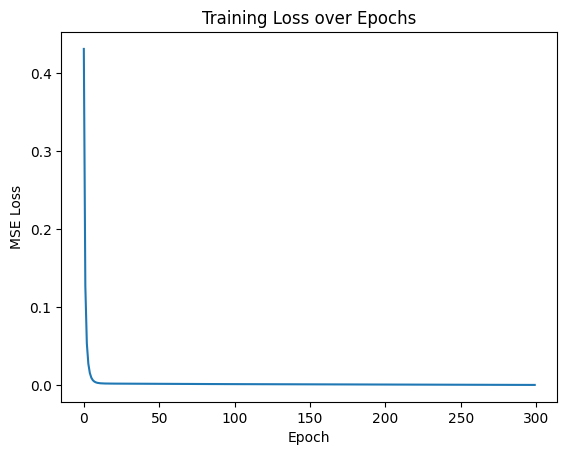

Test MSE: 0.004981321370281897


In [10]:
# Plot the MSE loss for each epoch
plt.plot(train_losses)
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.title('Training Loss over Epochs')
plt.show()

# Evaluate the LSTM model
mse = 0

with torch.no_grad():
    # Initialize the hidden state and the cell state
    # The hidden state and the cell state reset to zero for every epoch
    hs = torch.zeros(1, hidden_size)
    cs = torch.zeros(1, hidden_size)

    for data, label in test_loader:
        hidden = (hs, cs)
        output, hidden = lstm(data.float(), hidden)
        output_fc = fc(hidden[-1])
        hs = hs.detach()
        cs = cs.detach()

        mse += ((output_fc - label)**2).mean().item()

mse /= len(test_loader)
print('Test MSE: {}'.format(mse))

In [11]:
# Combine the parameters of the LSTM layer and linear layer
params = list(lstm.parameters()) + list(fc.parameters())

# Print the number of parameters
print("Number of parameters:", sum(p.numel() for p in params))

# Print the shapes of the parameters
for name, param in lstm.named_parameters():
    print("Name: ", name)
    print("shape: ", param.shape)
    print("Weight: ", param.data)

Number of parameters: 271
Name:  weight_ih_l0
shape:  torch.Size([24, 3])
Weight:  tensor([[ 0.3427, -0.1286, -0.2998],
        [-0.1897,  0.5629,  0.2647],
        [ 0.1047,  0.3115, -0.2247],
        [ 0.4456,  0.0861,  0.2575],
        [ 0.1336,  0.4106,  0.1566],
        [-0.1171,  0.0988, -0.1041],
        [-0.3658, -0.1133,  0.1693],
        [-0.1027, -0.0338, -0.2863],
        [ 0.2199,  0.0963,  0.0878],
        [-0.1979,  0.2255, -0.2482],
        [ 0.0433, -0.3474,  0.0226],
        [ 0.0750,  0.1688,  0.2775],
        [-0.3006, -0.4791, -0.4044],
        [ 0.4147,  0.1376, -0.1282],
        [-0.2047, -0.2706,  0.4631],
        [ 0.4753,  0.4958,  0.4403],
        [-0.2307, -0.1098, -0.6175],
        [ 0.4579,  0.5393,  0.5466],
        [ 0.1048, -0.0977, -0.3192],
        [-0.2076,  0.0995,  0.1164],
        [ 0.2082,  0.3224, -0.1650],
        [-0.0574, -0.0219,  0.2688],
        [-0.2875,  0.0630, -0.3721],
        [ 0.3311,  0.3820, -0.1472]])
Name:  weight_hh_l0
shape:  

In [12]:
# Save the trained LSTM model
torch.save(lstm.state_dict(), 'lstm.pt')

# Load the model
lstm = nn.LSTM(input_size, hidden_size, batch_first=True)
lstm.load_state_dict(torch.load('lstm.pt'))

<All keys matched successfully>

### LSTM and RNN comparison
Let's implement RNN network for this dataset and compare the structure of the codes for these two models (RNN and LSTM)!

In [13]:
# The RNN model
# Initializing Hyperparameters
epochs = 300
lr = 0.3

# 1. Creating a FeedForwardNetwork
# 1.1 Structure (Architecture) of NN
# Define the input size, hidden size and number of outputs
input_size = 3
hidden_size = 6
output_size = 1


rnn = torch.nn.RNN(input_size, hidden_size, batch_first=True)
# Initialize the output layer
fc = torch.nn.Linear(hidden_size, output_size)


# 1.2 Loss Function
loss_mse = torch.nn.MSELoss()

# 1.3 Optmization Approch
optimizer = torch.optim.SGD(rnn.parameters(), lr=lr)

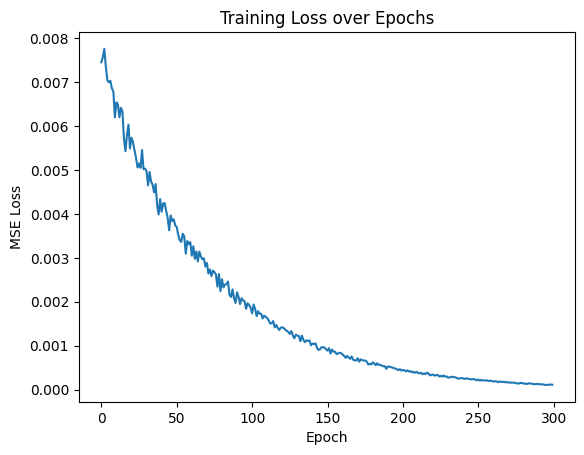

Test MSE: 0.0024610972794708364


In [14]:
train_losses = []
test_losses = []

# Loop over the number of epochs
for i in range(epochs):
    train_loss = 0

    # Initialize the hidden state and the cell state
    # The hidden state resets to zero for every epoch
    hs = torch.zeros(1, hidden_size)

    # Get the input and target at position i
    for i, (data, label) in enumerate(train_loader):

        # 2. Forward Pass
        output, hidden = rnn(data.float(), hs)
        output_fc = fc(hidden[-1])

        # 3. FeedForward Evaluation
        loss = loss_mse(output_fc, label.float())
        hs = hs.detach()

        # 4. Backward Pass / Gradient Calculation
        loss.backward()

        # Store the loss for each epoch
        train_loss += loss.item()

        # 5. Back Propagation / Update Weights
        optimizer.step()
        optimizer.zero_grad()

    # Calculate the average training loss
    train_loss = train_loss / len(train_loader)
    train_losses.append(train_loss)

# Plot the MSE loss for each epoch
plt.plot(train_losses)
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.title('Training Loss over Epochs')
plt.show()

# Evaluate the RNN model
mse = 0

with torch.no_grad():
    hidden = torch.zeros(data.size(0), hidden_size)
    for data, label in test_loader:
        output, hidden = rnn(data.float(), hidden)
        output_fc = fc(hidden[-1])

        mse += ((output_fc - label)**2).mean().item()

mse /= len(test_loader)
print('Test MSE: {}'.format(mse))

In [15]:
# Save the trained RNN model
torch.save(rnn.state_dict(), 'rnn.pt')

# Load the model
rnn = nn.RNN(input_size, hidden_size, batch_first=True)
rnn.load_state_dict(torch.load('rnn.pt'))

<All keys matched successfully>

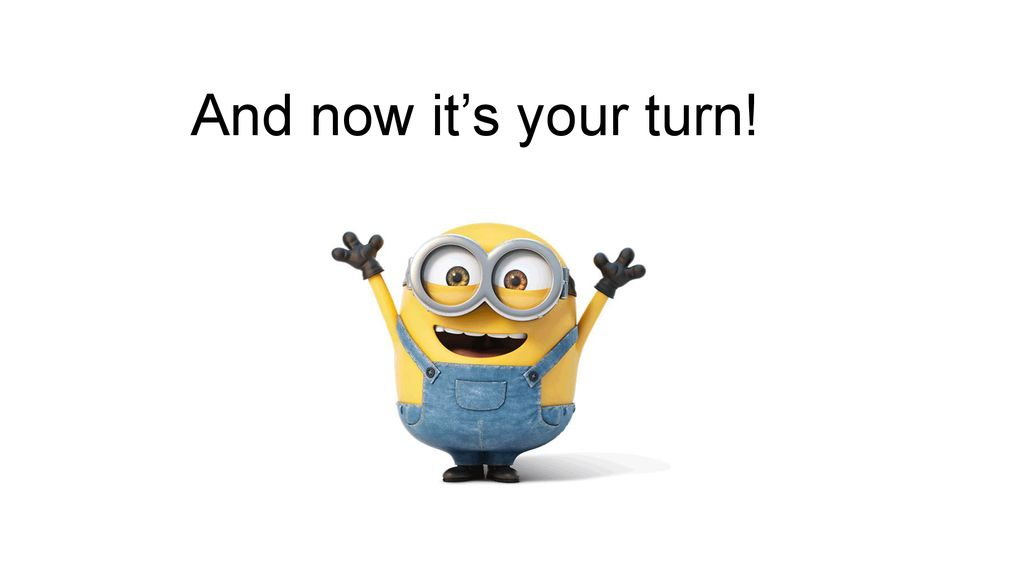